# Time series forecasting: Sales

In [70]:
# Your code here
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### Step 1. Reading the data set

In [72]:
url="https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv"
data=pd.read_csv(url, parse_dates=["date"], index_col="date")
data.columns=["sales"]

In [73]:
data.shape

(366, 1)

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2022-09-03 17:10:08.079328 to 2023-09-03 17:10:08.079328
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sales   366 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


Plot the time serie

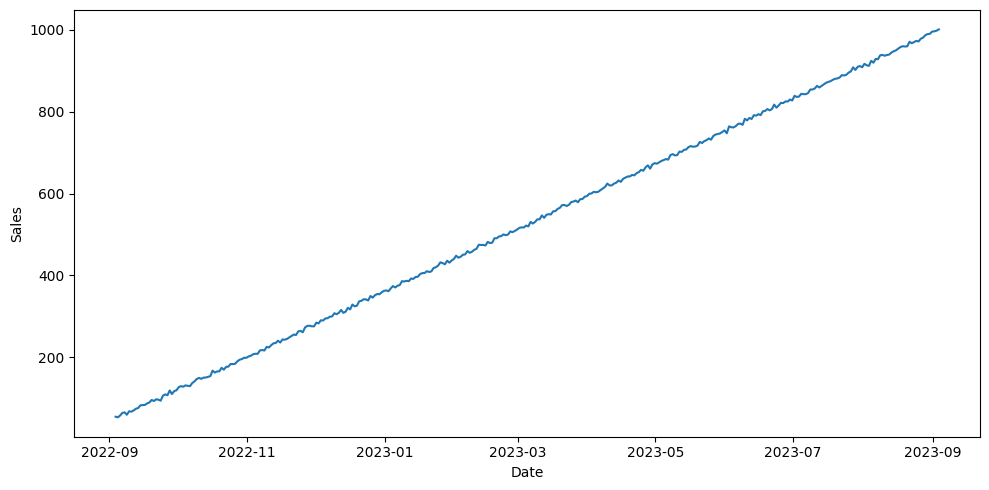

In [75]:
plt.figure(figsize=(10,5))
sns.lineplot(data["sales"])
plt.xlabel("Date")
plt.ylabel("Sales")

plt.tight_layout()
plt.show()

### Step 2. Analysis of a time series

Decomposition of the series

In [76]:
decomposition = seasonal_decompose(data["sales"], period = 12)
decomposition

Trend analysis

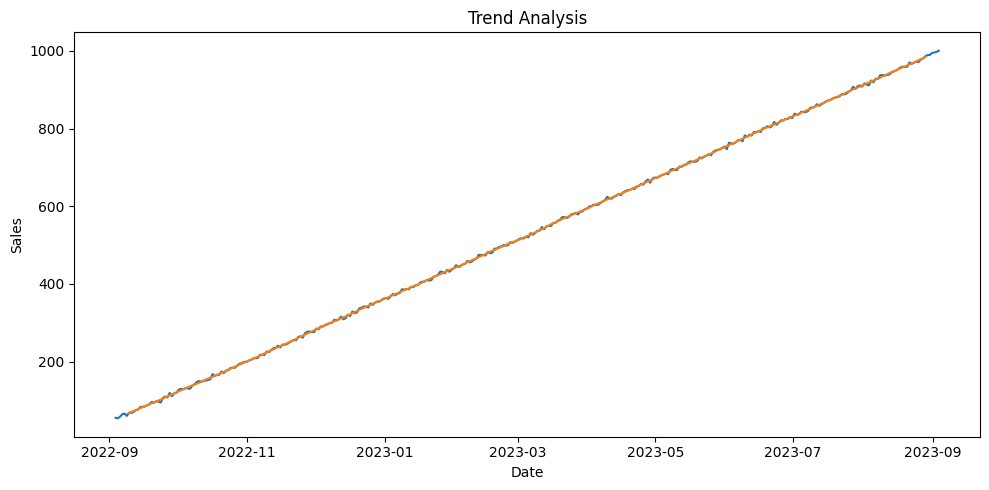

In [77]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = data["sales"])
sns.lineplot(data = trend)

plt.title("Trend Analysis")
plt.xlabel("Date")
plt.ylabel("Sales")

plt.tight_layout()
plt.show()

Seasonality analysis

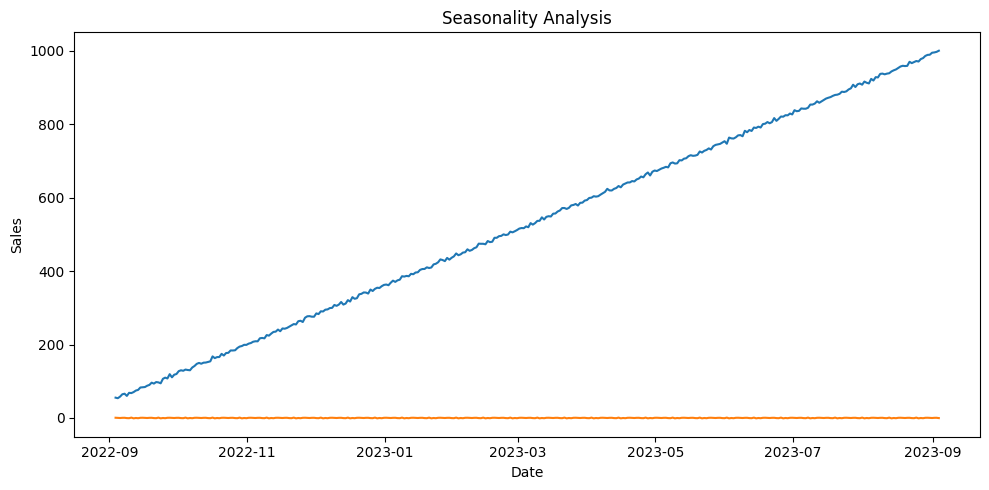

In [78]:
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = data["sales"])
sns.lineplot(data = seasonal)

plt.title("Seasonality Analysis")
plt.xlabel("Date")
plt.ylabel("Sales")

plt.tight_layout()
plt.show()

In [79]:
data["MA_5"]=data["sales"].rolling(5).mean()
data["ES_5"]=data["sales"].ewm(5).mean()

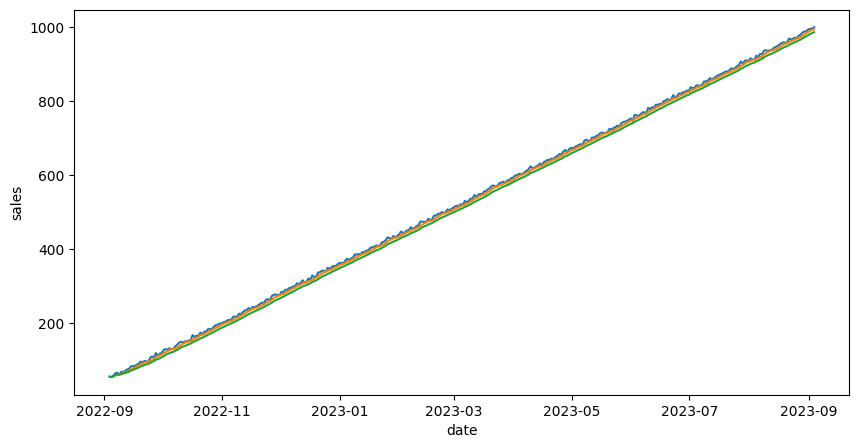

In [80]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=data.index, y=data["sales"])
sns.lineplot(x=data.index, y=data["MA_5"])
sns.lineplot(x=data.index, y=data["ES_5"]);

In [91]:
results=seasonal_decompose(data["sales"], period = 12)

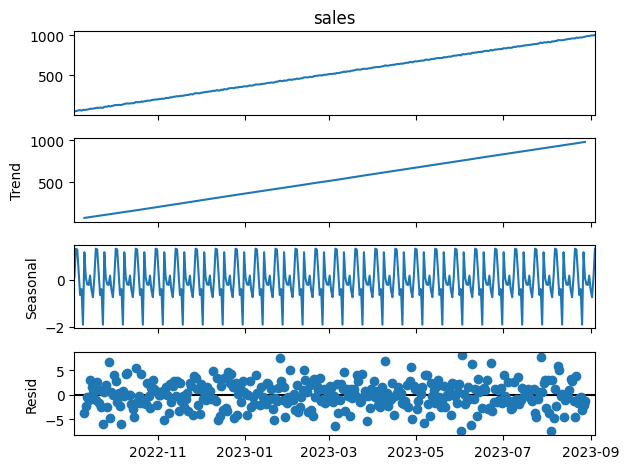

In [82]:
results.plot();

In [83]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Dickey-Fuller test results:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(data["sales"])

Dickey-Fuller test results:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

In [86]:
adf_stat, p_value,*_ = adfuller(data["sales"])

In [87]:
p_value

np.float64(0.9861899815311063)

In [84]:
print("Here we can see that the p-value is greater than 0.05, which means that our null hypothesis will be rejected, and we will take this series as non-stationary.")

Here we can see that the p-value is greater than 0.05, which means that our null hypothesis will be rejected, and we will take this series as non-stationary.


Analysis of variability

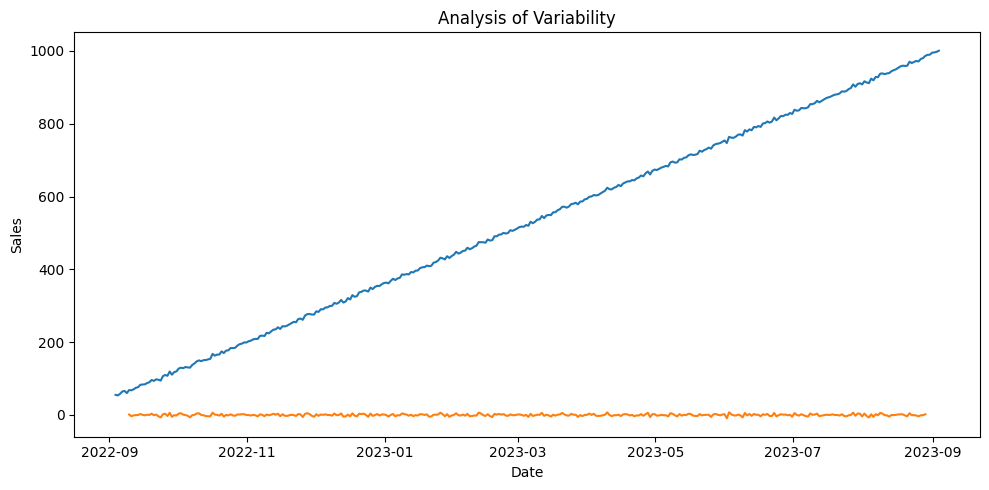

In [85]:
residual = decomposition.resid

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = data["sales"])
sns.lineplot(data = residual)

plt.title("Analysis of Variability")
plt.xlabel("Date")
plt.ylabel("Sales")

plt.tight_layout()
plt.show()

Autocorrelation analysis

<Figure size 640x480 with 0 Axes>

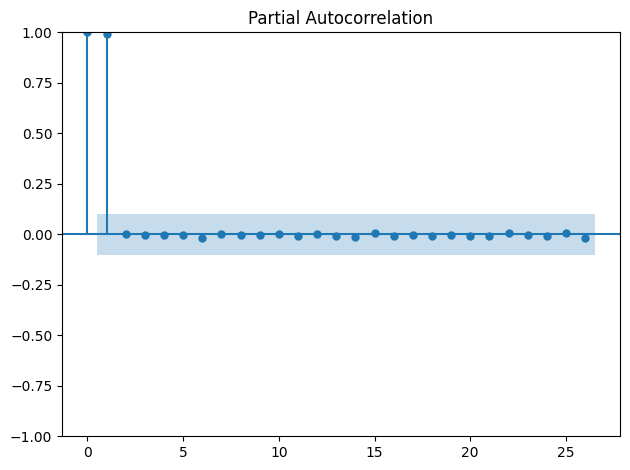

In [101]:
plt.figure()
plot_pacf(data["sales"])
plt.tight_layout()
plt.show();

<Figure size 640x480 with 0 Axes>

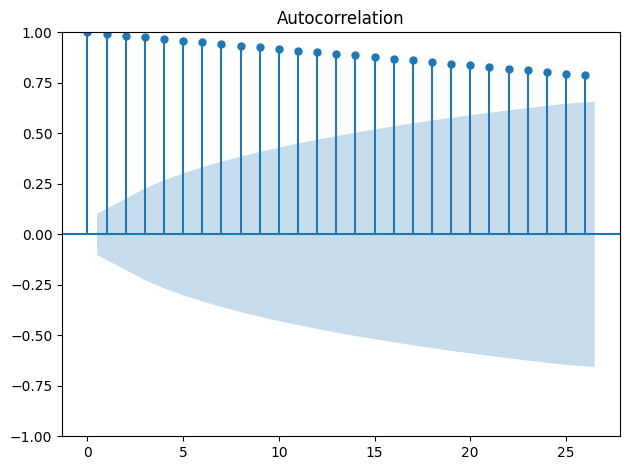

In [102]:
plt.figure()
plot_acf(data["sales"])
plt.tight_layout()
plt.show();

### Step 3: Model training

In [105]:
data_stationary = data["sales"].diff().dropna()

test_stationarity(data_stationary)

Dickey-Fuller test results:


Test Statistic                -9.430263e+00
p-value                        5.212954e-16
#Lags Used                     1.200000e+01
Number of Observations Used    3.520000e+02
Critical Value (1%)           -3.449065e+00
Critical Value (5%)           -2.869786e+00
Critical Value (10%)          -2.571163e+00
dtype: float64

Now the series is stationary, and we can apply the automatic ARIMA method

In [113]:
model= sm.tsa.AutoReg(data["sales"], lags=2).fit()

/home/vscode/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [114]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                  sales   No. Observations:                  366
Model:                     AutoReg(2)   Log Likelihood                -979.658
Method:               Conditional MLE   S.D. of innovations              3.570
Date:                Thu, 24 Apr 2025   AIC                           1967.315
Time:                        23:11:56   BIC                           1982.904
Sample:                    09-05-2022   HQIC                          1973.511
                         - 09-03-2023                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9925      0.420      9.516      0.000       3.170       4.815
sales.L1       0.4569      0.044     10.401      0.000       0.371       0.543
sales.L2       0.5431      0.044     12.360      0.0